## Data Mining Homework 2
### Ronak Mehta SJSU ID: 014505387

### Write a python program to generate the quantile-quantile plot for the scores obtained by the students of the two sections. Which section performed better? Justify your answer based on statistical analysis.

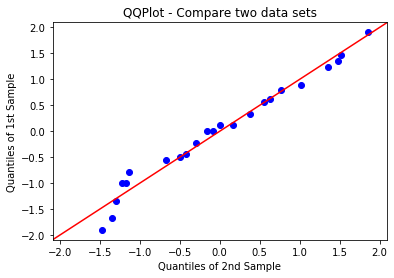

In [88]:
##Write a python program to generate the quantile-quantile plot for the scores obtained by the students of the two sections.
##Which section performed better? Justify your answer based on statistical analysis.
##Section A: 47, 63, 71, 39, 47, 49, 43, 37, 81, 69, 38, 13, 29, 61, 49, 53, 57, 23, 58, 17, 73, 33, 29
##Section B: 20, 49, 85, 17, 33, 62, 93, 64, 37, 81, 22, 18, 45, 42, 14, 39, 67, 47, 53, 73, 58, 84, 21
##Import the libraries for QQ plot
import statsmodels.api as sm
from matplotlib import pyplot as plt

import numpy as np
x = [47, 63, 71, 39, 47, 49, 43, 37, 81, 69, 38, 13, 29, 61, 49, 53, 57, 23, 58, 17, 73, 33, 29]
x = np.asarray(x)
y = [20, 49, 85, 17, 33, 62, 93, 64, 37, 81, 22, 18, 45, 42, 14, 39, 67, 47, 53, 73, 58, 84, 21]
y = np.asarray(y)
pp_x = sm.ProbPlot(x, fit=True)
pp_y = sm.ProbPlot(y, fit=True)

fig = pp_x.qqplot(line='45', other=pp_y)
h = plt.title('QQPlot - Compare two data sets')
plt.show()

#### Statistical Analysis: We can see from the QQ plot that Section A performed better from -1.75 quartile to -0.5 quartile but perfomed poor with respect to Section A from -1.5 to -1.75 and 1.0 to 1.5

### Problem 1(b) The scores obtained by which of the above two sections is closer to a normal distribution?

In [75]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
seca = [47, 63, 71, 39, 47, 49, 43, 37, 81, 69, 38, 13, 29, 61, 49, 53, 57, 23, 58, 17, 73, 33, 29]
secb = [20, 49, 85, 17, 33, 62, 93, 64, 37, 81, 22, 18, 45, 42, 14, 39, 67, 47, 53, 73, 58, 84, 21]

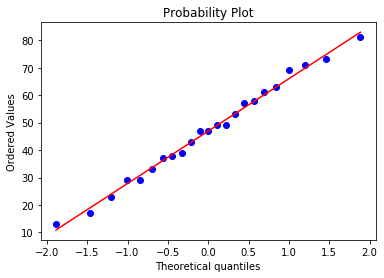

In [77]:
pp1 = stats.probplot(seca, dist="norm", plot=plt,fit=True)

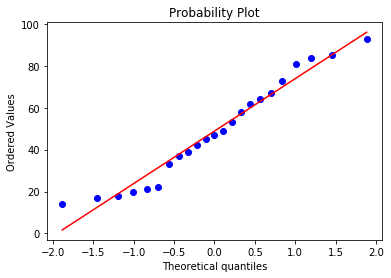

In [56]:
pp2 = stats.probplot(secb, dist="norm", plot=plt,fit=True)

#### Section A is closer to normal distribution.

### 2 (b) Apply any two ML algorithms that you learned in class. Which one of the algorithm fares better? Use as many evaluation metrics as possible to discuss the performance of the algorithms.

Unique Values of Dataset column [1 2]


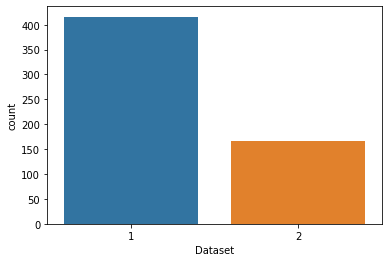

In [2]:
### Import the necessary libraries
import pandas as pd
from sklearn.utils import resample
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

### Read the file using read_csv()
### You can find the dataset at https://www.kaggle.com/uciml/indian-liver-patient-records
lp = pd.read_csv("/Users/ronakmehta/Desktop/indian_liver_patient.csv",encoding="utf-8")

#To know all the columns
lp.columns

print("Unique Values of Dataset column",lp.Dataset.unique())

sns.countplot(data=lp, x = 'Dataset', label='Count')

In [95]:
#Map the Gender Column for Male as 0 and Female as 1
lp['Gender'] = lp['Gender'].map({'Female':1, 'Male':0})
lp.head()

lp.dtypes
print(lp['Dataset'].value_counts())

lp["Albumin_and_Globulin_Ratio"] = lp.Albumin_and_Globulin_Ratio.fillna(lp['Albumin_and_Globulin_Ratio'].mean())

lp.isnull().sum()

1    416
2    167
Name: Dataset, dtype: int64


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [96]:
X_train, X_test, y_train, y_test = train_test_split(lp, 
           lp['Dataset'], test_size=0.30, 
            random_state=100)

lp_majority = X_train[X_train.Dataset==1]
lp_minority = X_train[X_train.Dataset==2]

X_train.Dataset.value_counts()
lp_minority_upsampled = resample(lp_minority, replace=True, n_samples= 287, random_state=100)
lp_upsampled = pd.concat([lp_minority_upsampled,lp_majority])
lp_upsampled.Dataset.value_counts()

y = lp_upsampled.Dataset
x = lp_upsampled.drop('Dataset',axis=1)

#Implement Logistic Regression model
logitMod = LogisticRegression(solver='lbfgs')
logitMod.fit(x,y)

X_test = X_test.drop('Dataset',axis=1)
Predictions = logitMod.predict(X_test)

score = logitMod.score(X_test,y_test)
print("Accuracy on Logistic Regression Model is",score)

Accuracy on Logistic Regression Model is 0.6457142857142857


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [97]:
##Since the dataset has the labels(Dependant variable) its imperative to use supervised learning
##Implement on Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
model = GaussianNB()
model.fit(x,y)
y_pred = model.predict(X_test)
print("Accuracy for Naive Bayes:",metrics.accuracy_score(y_test, y_pred))

Accuracy for Naive Bayes: 0.56


In [98]:
#Train on Decision Tree Classifier
from sklearn import tree, preprocessing
clf = tree.DecisionTreeClassifier(criterion='entropy').fit(x, y)
d_pred = clf.predict(X_test)
print("Accuracy for Decision Tree Classifier:",metrics.accuracy_score(y_test, d_pred))

Accuracy for Decision Tree Classifier: 0.7085714285714285


#### From the above models, Decision Tree Classifier performed better.

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//ana

LR: 0.710111 (0.051154)
NB: 0.555757 (0.082278)
CART: 0.660345 (0.075679)


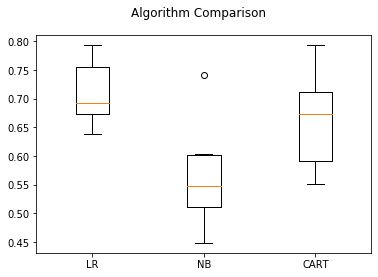

In [83]:
##Metrics 1
##Perform K fold Cross Validation to evaluate the models.
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
array = lp.values
X = array[:,:10]
Y = array[:,10]
models = []
models.append(('LR', LogisticRegression(solver='lbfgs')))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=100)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    score = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(score)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### From the K fold cross validation, the performance of the models are in the following manner
#### Logisitic Regression > Decision Tree > Naive Bayes

In [103]:
##Evaluation Metrics 2: Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC)
from sklearn.metrics import roc_auc_score
print("ROC AUC Curve Area for Logistic Regression",roc_auc_score(Predictions, y_test))
print("ROC AUC Curve Area for Naive Bayes",roc_auc_score(y_pred, y_test))
print("ROC AUC Curve Area for Decision Tree",roc_auc_score(d_pred, y_test))

ROC AUC Curve Area for Logistic Regression 0.6526143790849672
ROC AUC Curve Area for Naive Bayes 0.6492753623188406
ROC AUC Curve Area for Decision Tree 0.6257480053191489


#### From Area Under the Receiver Operating Characteristic Curve, Logistic Regression performed better again.

In [104]:
##Evaluation Metrics 3: Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, Predictions)

array([[76, 53],
       [ 9, 37]])

In [108]:
tp = 76
fp = 53
fn = 9
tn = 37
sen1 = 76+9
d = tp+fp+fn+tn
print("Accuracy of Logistic Regression:",(tp+tn/d),"And sensitivity:",sen1)

Accuracy of Logistic Regression: 76.21142857142857 And sensitivity: 85


In [107]:
confusion_matrix(y_test, y_pred)
tp = 56
fp = 73
fn = 4
tn = 42
sen2 = 56+4
d = tp+fp+fn+tn
print("Accuracy of Naive Bayes:",(tp+tn/d),"And sensitivity",sen2)

Accuracy of Logistic Regression: 56.24 And sensitivity 60


In [111]:
confusion_matrix(y_test, d_pred)
tp = 103
fp = 26
fn = 25
tn = 21
sen3 = 103+25
d = tp+fp+fn+tn
print("Accuracy of Decision Tree:",(tp+tn/d),"And sensitivity",sen3)

Accuracy of Decision Tree: 103.12 And sensitivity 128


#### Higher the sensitivity, the better the model. Hence the Decision Tree is better.

### Problem 3 (b) Predict the breast cancer from the Breast Cancer dataset using Naive Bayes Model from scratch

In [84]:
### Import the necessary libraries
import csv
import random
import math

#Function to load the file from the disk and delete the unwanted rows, "Unnamed and Id"
#Map the Class column values, benign as 0 and malignant into 1
#Finally convert the string values into float in every list of list
def loadCsv(filename):
    lines = csv.reader(open(filename, "rt"))
    dataset = list(lines)
    del dataset[0]
    for i in range(len(dataset)):
        del dataset[i][0:2]
    for i in range(len(dataset)):
        if dataset[i][-1]=='benign':
            dataset[i][-1]=0
        else:
            dataset[i][-1]=1
    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]]
    return dataset

#Split the dataset into training and test
def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]

#Separate the training dataset by Class and return the dictionary variable
def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated

#Function to find out the mean of each column
def mean(numbers):
    return sum(numbers)/float(len(numbers))

#Function to find out the standard deviation of each column
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

#Function to store the summary of each column into a list summaries
def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries

#Function will provide the overall summary of each column
def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries

#Function to calculate the Gaussian Probability distribution function for x
def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

#Function to calculate the probabilities of predicting each class for a given row
def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities

#Return the best label for each row in testSet
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

#Function to return the predictions
def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

#Function to calculate the accuracy
def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if testSet[i][-1] == predictions[i]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

def main():
    filename = '/Users/ronakmehta/Desktop/BreastCancer.csv'
    #Splitted the Breast Cancer dataset into 67% as Training set and remaining 33% into Test set
    splitRatio = 0.67
    dataset = loadCsv(filename)
    #print(dataset)
    trainingSet, testSet = splitDataset(dataset, splitRatio)
    print('Splitted',len(dataset),'rows into',len(trainingSet),'Training set rows and',len(testSet),'into Test set rows')
    # prepare model
    summaries = summarizeByClass(trainingSet)
    # test model
    predictions = getPredictions(summaries, testSet)
    accuracy = getAccuracy(testSet, predictions)
    #Print the accuracy
    print('Accuracy: ',accuracy)
main()

Splitted 683 rows into 457 Training set rows and 226 into Test set rows
Accuracy:  96.01769911504425


#### Logistic Regression Performed better when compared with Naive Bayes with 0.08% more accuracy
#### However in order to conclude this we can try k fold cross validation

LR: 0.967860 (0.033107)
NB: 0.963427 (0.023778)


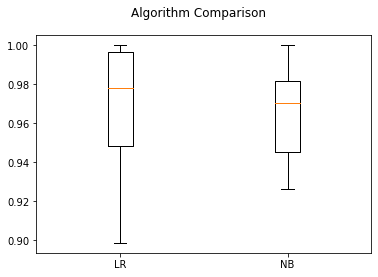

In [85]:
# Compare Algorithms
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# load dataset and prepare for 10 fold cross validation
df = pd.read_csv("/Users/ronakmehta/Desktop/BreastCancer.csv",encoding="utf-8")
df = df.drop(['Unnamed: 0', 'Id'],axis=1)
df['Class'] = df['Class'].map({'malignant':1, 'benign':0})
array = df.values
X = array[:,0:9]
Y = array[:,9]
# prepare models
models = []
models.append(('LR', LogisticRegression(solver='lbfgs')))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=100)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    score = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(score)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### From K fold cross vaildation, we conclude that Logistic Regression Performed better when compared with Naive Bayes

### Problem 4) Python code to generate the decision tree programmatically

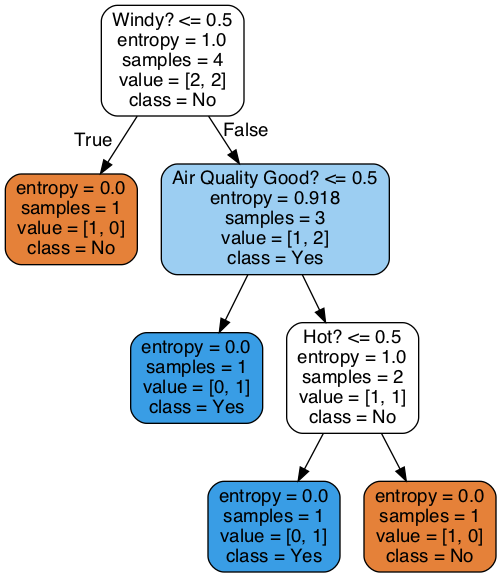

In [3]:
## Import the libraries
import pydotplus
import pandas as pd
import numpy as np
from sklearn import tree, preprocessing
from IPython.display import Image
from sklearn.tree import export_graphviz

##Read the CSV file given
## You can find the dataset at https://drive.google.com/file/d/1ZxNShuKheKlqgSnEMHe1uYMi79YCIuEU/view?usp=sharing
df = pd.read_csv('/Users/ronakmehta/Desktop/PlayTennis.csv',encoding ='utf-8')
df

##Encode the Labels 
le = preprocessing.LabelEncoder()
windy = le.fit_transform(df['Windy?'])
air = le.fit_transform(df['Air Quality Good?'])
hot = le.fit_transform(df['Hot?'])
pt = le.fit_transform(df['Play Tennis?'])

##Map the Features
d = {'Windy?':windy,'Air Quality Good?':air,'Hot?':hot}

##Make a dataframe of it
dt = pd.DataFrame(data=d)
X = dt
Y = pt

##Train the Decision Tree model
clf = tree.DecisionTreeClassifier(criterion='entropy').fit(X, Y)

##Display the tree
dot_data = tree.export_graphviz(clf,out_file=None,
                                feature_names=['Windy?', 'Air Quality Good?', 'Hot?'] ,
                                class_names=['No','Yes'],
                                filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Problem 5 (b) Python code to list the support vectors, their indices, and the number of support vectors in each class of the breast cancer dataset using support vector machines classifier.

In [89]:
##Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np
%matplotlib inline
from sklearn.datasets import load_breast_cancer

## Load the dataset into cancer variable
cancer = load_breast_cancer()
X = cancer.data
print(X.shape)
Y = cancer.target
print(Y.size)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Create support vector classifier object
svc = SVC(kernel='linear', random_state=0)

# Train classifier
model = svc.fit(X_std, Y)

(569, 30)
569


In [91]:
## The support vectors are
model.support_vectors_

array([[ 0.4892736 ,  1.08449508,  0.48320086, ..., -0.04120657,
        -0.14844061, -1.16793364],
       [ 0.24502139,  1.37537847,  0.14708883, ..., -1.30364376,
        -2.16095969, -1.60183949],
       [-0.19520061,  0.53298017, -0.23845144, ..., -0.05186519,
         0.1508488 , -0.69191177],
       ...,
       [-0.18952033, -0.12557983, -0.18655179, ...,  0.42777263,
         0.99856584,  0.1498545 ],
       [ 0.09733401,  1.32651006,  0.15821018, ...,  0.08974217,
         0.46308046,  1.01711204],
       [ 0.17401784,  1.42657394,  0.11248906, ..., -0.0777504 ,
        -0.28918752, -0.79720182]])

In [92]:
# View indices of support vectors
model.support_

array([ 13,  38,  40,  73,  86,  91,  99, 135, 184, 190, 194, 197, 205,
       213, 215, 255, 263, 297, 489, 514, 536,  68,  81,  89, 157, 208,
       225, 238, 291, 340, 363, 396, 413, 455, 466, 469, 491, 526, 541,
       542], dtype=int32)

In [93]:
# View number of support vectors for each class
model.n_support_

array([21, 19], dtype=int32)